<a href="https://colab.research.google.com/github/PuttupuR/My-Project/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("/content/bank-additional-full.csv",sep=';')

In [ ]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.shape

(41199, 21)

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [ ]:
#extra step-->if not needed skip it
#if yes -->1 or no-->0
data['y']=np.where(data['y']=='yes',1,0)
#data['y']=data['y'].astype(str)

In [ ]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
data.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
housing         0
loan            0
contact         0
month           0
day_of_week     0
duration        0
campaign        0
emp.var.rate    0
y               0
dtype: int64

In [ ]:
data['job'].mode()[0]

'admin.'

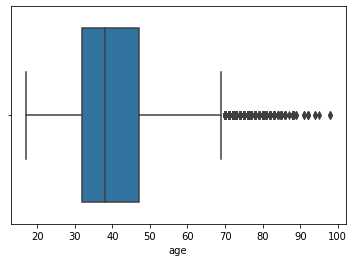

In [ ]:
#outliers
import seaborn as sns
sns.boxplot(x=data["age"])

In [ ]:
sns.boxplot(x=data['duration'])

In [ ]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

In [ ]:
data=data[~((data<(Q1-1.5*IQR))| (data>(Q3+1.5*IQR))).any(axis=1)]

In [ ]:
data.shape

(30363, 21)

In [ ]:
col_list=list(data.columns)

In [ ]:
col_list.remove('y')

In [ ]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [ ]:
#handling null values
for col in col_list:
  if data[col].dtypes=='object':
    data[col]=data[col].fillna(data[col].mode()[0])
  else:
    data[col]=data[col].fillna(data[col].mean())

In [ ]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 3
dtype: int64

In [ ]:
#Binning of age
#extra code
#10 15 25 5 60
#1-10-->10,5
#11-20-->15
#21-30-->25
#51-60-->60
bins = [0,1,5,10,25,50,100]
data['age']=pd.cut(data['age'],bins)
data['age']=data.age.astype(str)

In [ ]:
data['age'].unique()

array(['(50, 100]', '(25, 50]', '(10, 25]'], dtype=object)

In [ ]:
data.head(10)

In [ ]:
col_list=[]
for col in data.columns:
  if ((data[col].dtype=='object')&(col!='y')):
    col_list.append(col)

In [ ]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for i in col_list:
  data[i]=labelencoder.fit_transform(data[i])

In [ ]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate,y
0,2,3,1,0,0,0,0,1,6,1,261.00,1.00,1.10,no
1,2,7,1,3,1,0,0,1,6,1,149.00,1.00,1.10,no
2,1,7,1,3,0,2,0,1,6,1,226.00,1.00,1.10,no
3,1,0,1,1,0,0,0,1,6,1,151.00,1.00,1.10,no
4,2,7,1,3,0,0,2,1,6,1,307.00,1.00,1.10,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30363 entries, 0 to 41197
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30363 non-null  int64  
 1   job             30363 non-null  int64  
 2   marital         30363 non-null  int64  
 3   education       30363 non-null  int64  
 4   default         30363 non-null  int64  
 5   housing         30363 non-null  int64  
 6   loan            30363 non-null  int64  
 7   contact         30363 non-null  int64  
 8   month           30363 non-null  int64  
 9   day_of_week     30363 non-null  int64  
 10  duration        30363 non-null  float64
 11  campaign        30363 non-null  float64
 12  pdays           30363 non-null  float64
 13  previous        30363 non-null  float64
 14  poutcome        30363 non-null  int64  
 15  emp.var.rate    30363 non-null  float64
 16  cons.price.idx  30363 non-null  float64
 17  cons.conf.idx   30363 non-null 

In [ ]:
data['age'].value_counts()

1    24305
2     4949
0     1109
Name: age, dtype: int64

In [ ]:
data.isna().sum()

age             0
job             0
marital         0
education       0
default         0
housing         0
loan            0
contact         0
month           0
day_of_week     0
duration        0
campaign        0
emp.var.rate    0
y               3
dtype: int64

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in data.columns:
  if ((data[col].dtype !='object') & (col !='y')):
    col_list.append(col)

In [ ]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [ ]:
x=data[col_list]
x #dependent data

In [ ]:
for i in range(len(x.columns)):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in data.columns:
  if ((data[col].dtype !='object') & (col !='y')):
    col_list.append(col)

x=data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

           feature        VIF
0              age       1.10
1              job       1.03
2          marital       1.10
3        education       1.10
4          default       1.09
5          housing       1.01
6             loan       1.00
7          contact       2.72
8            month       2.06
9      day_of_week       1.01
10        duration       1.01
11        campaign       1.02
12           pdays 771,252.68
13        previous        NaN
14        poutcome        NaN
15    emp.var.rate      41.96
16  cons.price.idx       8.72
17   cons.conf.idx       3.87
18       euribor3m      88.83
19     nr.employed      35.20


In [ ]:
data=data.drop(['pdays'],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in data.columns:
  if ((data[col].dtype !='object') & (col !='y')):
    col_list.append(col)

x=data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

           feature       VIF
0              age      8.70
1              job      2.09
2          marital      5.20
3        education      4.46
4          default      1.41
5          housing      2.19
6             loan      1.21
7          contact      3.59
8            month      7.82
9      day_of_week      3.11
10        duration      3.17
11        campaign      3.62
12        previous       NaN
13        poutcome       NaN
14    emp.var.rate     41.97
15  cons.price.idx 51,263.68
16   cons.conf.idx    160.36
17       euribor3m    439.11
18     nr.employed 58,415.54


In [ ]:
data=data.drop(['nr.employed'],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in data.columns:
  if ((data[col].dtype !='object') & (col !='y')):
    col_list.append(col)

x=data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

In [ ]:
data=data.drop(['cons.price.idx'],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in data.columns:
  if ((data[col].dtype !='object') & (col !='y')):
    col_list.append(col)

x=data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

In [ ]:
data=data.drop(['euribor3m'],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in data.columns:
  if ((data[col].dtype !='object') & (col !='y')):
    col_list.append(col)

x=data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

In [ ]:
data=data.drop(['cons.conf.idx'],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in data.columns:
  if ((data[col].dtype !='object') & (col !='y')):
    col_list.append(col)

x=data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

         feature  VIF
0            age 5.89
1            job 2.05
2        marital 4.11
3      education 3.95
4        default 1.40
5        housing 2.11
6           loan 1.20
7        contact 2.48
8          month 5.14
9    day_of_week 2.89
10      duration 2.93
11      campaign 3.25
12      previous  NaN
13      poutcome  NaN
14  emp.var.rate 1.41


In [ ]:
data=data.drop(['previous','poutcome'],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in data.columns:
  if ((data[col].dtype !='object') & (col !='y')):
    col_list.append(col)

x=data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

         feature  VIF
0            age 5.89
1            job 2.05
2        marital 4.11
3      education 3.95
4        default 1.40
5        housing 2.11
6           loan 1.20
7        contact 2.48
8          month 5.14
9    day_of_week 2.89
10      duration 2.93
11      campaign 3.25
12  emp.var.rate 1.41


In [ ]:
Ind_Features=list(vif_data.feature)
Ind_Features

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'emp.var.rate']

In [ ]:
df_ind=data[Ind_Features]
df_ind

In [ ]:
df_dep =data['y']
df_dep

0        0
1        0
2        0
3        0
4        0
        ..
41185    0
41186    1
41188    0
41191    0
41197    0
Name: y, Length: 30363, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_ind,df_dep,test_size=0.25,random_state=0)

In [ ]:
x_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate
30588,1,2,1,2,0,0,0,0,6,1,104.00,3.00,-1.80
13489,1,0,1,3,0,0,0,0,3,2,88.00,1.00,1.40
24840,1,9,1,5,0,2,0,1,7,3,89.00,1.00,-0.10
21456,1,4,2,6,0,0,0,0,1,3,189.00,1.00,1.40
2753,1,7,2,1,1,2,0,1,6,4,230.00,1.00,1.10


In [ ]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate
30588,1,2,1,2,0,0,0,0,6,1,104.00,3.00,-1.80
13489,1,0,1,3,0,0,0,0,3,2,88.00,1.00,1.40
24840,1,9,1,5,0,2,0,1,7,3,89.00,1.00,-0.10
21456,1,4,2,6,0,0,0,0,1,3,189.00,1.00,1.40
2753,1,7,2,1,1,2,0,1,6,4,230.00,1.00,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15161,1,7,1,3,0,0,0,0,3,2,345.00,1.00,1.40
22937,1,9,0,3,0,2,0,0,1,1,81.00,3.00,1.40
11280,1,9,1,6,0,0,0,1,4,2,65.00,1.00,1.40
12469,1,7,1,3,1,2,0,1,3,1,173.00,3.00,1.40


In [ ]:
x_train.shape

(22772, 13)

In [ ]:
x_test.shape

(7591, 13)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr=LogisticRegression()


In [ ]:
#Model Fitting/Training
logisticRegr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
test_pred = logisticRegr.predict(x_test)

In [ ]:
np.unique(test_pred)

array([0, 1])

In [ ]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#divide data into dependent/independent
#divide data into train and test
#traing the model
#testing the model
#accuracy

In [ ]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pd.DataFrame(logisticRegr.predict_proba(x_test))

,0,1
0,0.99,0.01
1,0.97,0.03
2,1.00,0.00
3,1.00,0.00
4,0.99,0.01
...,...,...
7586,0.99,0.01
7587,0.44,0.56
7588,0.99,0.01
7589,1.00,0.00


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
c1=confusion_matrix(y_test,test_pred)
c1

array([[7095,   70],
       [ 359,   67]])

In [ ]:
(7095+67)/(7095+67+70+359)
#indirect way of finding accuracy

0.9434857067580029

In [ ]:
sen=c1[0,0]/(c1[0,0]+c1[0,1])
sen
#how much % the model predicted correct data
#99% the model has predicted correctly
#sensitivity=TP/TP+FN
#specificity=TN/TN+FP

0.9902302861130495

In [ ]:
sep=c1[1,1]/(c1[1,1]+c1[1,0])
sep
#

0.1572769953051643

In [ ]:
accuracy_score(y_test,test_pred)

0.9434857067580029